In [2]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
import pandas as pd

In [3]:
mnist=tf.keras.datasets.mnist.load_data()


In [4]:
(x_train, y_train), (x_test, y_test) = mnist

(<matplotlib.image.AxesImage at 0x279a5dbfdf0>, 5)

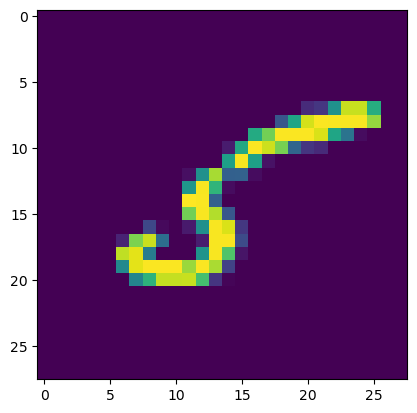

In [5]:
plt.imshow(x_train[11]),y_train[11]

The label for image number 12 is 9


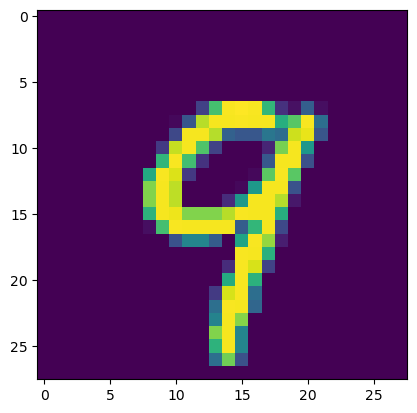

In [6]:
plt.imshow(x_test[12].reshape(28, 28));
print("The label for image number", 12, "is", y_test[12])

In [7]:
 model = tf.keras.Sequential([
     tf.keras.layers.Conv1D(filters=32,kernel_size=3,input_shape=[28,28],activation='relu'),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(10),
        
        tf.keras.layers.Softmax()
    ])

model.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

In [8]:
y_train=tf.cast(y_train,dtype=tf.float64)

In [9]:
x_train=tf.cast(x_train,dtype=tf.float64)

In [10]:
y_train=tf.convert_to_tensor(pd.get_dummies(y_train))
y_test=tf.convert_to_tensor(pd.get_dummies(y_test))

In [11]:
y_test

<tf.Tensor: shape=(10000, 10), dtype=uint8, numpy=
array([[0, 0, 0, ..., 1, 0, 0],
       [0, 0, 1, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)>

In [142]:
model.fit(x_train,y_train, validation_split=0.3,epochs=25)

Epoch 1/25
1313/1313 [==============================] - 3s 2ms/step - loss: 3.3466 - accuracy: 0.8630 - val_loss: 0.9404 - val_accuracy: 0.9204
Epoch 2/25
1313/1313 [==============================] - 2s 2ms/step - loss: 0.5877 - accuracy: 0.9331 - val_loss: 0.4958 - val_accuracy: 0.9386
Epoch 3/25
1313/1313 [==============================] - 2s 2ms/step - loss: 0.3331 - accuracy: 0.9486 - val_loss: 0.3927 - val_accuracy: 0.9407
Epoch 4/25
1313/1313 [==============================] - 2s 2ms/step - loss: 0.2495 - accuracy: 0.9524 - val_loss: 0.3889 - val_accuracy: 0.9421
Epoch 5/25
1313/1313 [==============================] - 2s 2ms/step - loss: 0.2378 - accuracy: 0.9579 - val_loss: 0.3756 - val_accuracy: 0.9494
Epoch 6/25
1313/1313 [==============================] - 3s 2ms/step - loss: 0.2286 - accuracy: 0.9593 - val_loss: 0.4130 - val_accuracy: 0.9465
Epoch 7/25
1313/1313 [==============================] - 2s 2ms/step - loss: 0.2217 - accuracy: 0.9606 - val_loss: 0.4248 - val_accuracy:

In [19]:
# model.save('MNIST.h5')

In [157]:
# model.save('MNIST.keras')

In [144]:
df_preds=pd.DataFrame(model.predict(x_test))
for i in df_preds:
    df_preds[i]=df_preds[i].astype(int)
preds_final=np.array(df_preds.idxmax(axis=1))

313/313 [==============================] - 0s 722us/step


In [145]:
preds_final,np.array(pd.DataFrame(y_test).idxmax(axis=1))

(array([7, 2, 1, ..., 4, 5, 6], dtype=int64),
 array([7, 2, 1, ..., 4, 5, 6], dtype=int64))

In [12]:
model1=tf.keras.models.load_model('MNIST.h5')


In [14]:
df_preds1=pd.DataFrame(model1.predict(x_test))
for i in df_preds1:
    df_preds1[i]=df_preds1[i].astype(int)
preds_final1=np.array(df_preds1.idxmax(axis=1))

313/313 [==============================] - 0s 746us/step


In [15]:
def evalu8(x,y):
    score=0
    for a,b in zip(x,y):
        if a==b:
            score+=1
    return score

In [17]:
evalu8(preds_final1,np.array(pd.DataFrame(y_test).idxmax(axis=1)))

9244

In [18]:
evalu8(preds_final,np.array(pd.DataFrame(y_test).idxmax(axis=1)))

NameError: name 'preds_final' is not defined